In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_dlim_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..D-Limonene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.341772
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.341772
2,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.341772
3,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.341772
4,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.341772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.240506
74996,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.240506
74997,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.240506
74998,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.240506


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..D-Limonene'], axis = 1)
y = df_rf[['X..D-Limonene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.34177215],
       [0.34177215],
       [0.34177215],
       ...,
       [0.24050633],
       [0.24050633],
       [0.24050633]])

<Axes: ylabel='Count'>

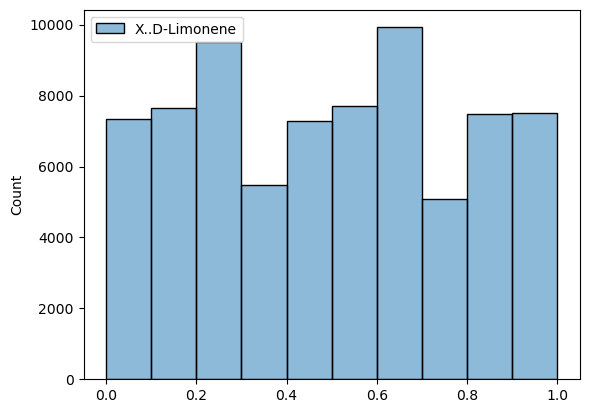

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3460/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.05312623996014345

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.011054729413151332

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.10514147332594942

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9749038915616636

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.8688912118196692

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.103711
1,lsa_1,0.091773
2,lsa_2,0.096387
3,lsa_3,0.099238
4,lsa_4,0.099537
...,...,...
81,tree,0.002371
82,tropical,0.004493
83,vanilla,0.003023
84,violet,0.000117


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
50,diesel,1.483413e-01
0,lsa_0,1.037107e-01
4,lsa_4,9.953735e-02
3,lsa_3,9.923771e-02
2,lsa_2,9.638705e-02
1,lsa_1,9.177257e-02
5,hybrid,4.194091e-02
6,indica,2.417293e-02
48,citrus,1.271379e-02
58,lemon,1.113529e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([1.04628113e-01, 9.05800431e-02, 9.73475377e-02, 9.88823763e-02,
       9.90196065e-02, 4.19736370e-02, 2.43168331e-02, 9.97198086e-03,
       5.02040197e-04, 2.87034995e-03, 5.42431192e-03, 2.41347467e-10,
       7.53848520e-03, 3.61657703e-04, 3.78877248e-03, 5.57548589e-03,
       8.34207335e-03, 6.64668439e-03, 2.89803237e-10, 8.91008190e-03,
       2.27693646e-07, 3.56036309e-10, 8.00744786e-03, 6.28660134e-03,
       8.43204821e-03, 2.81179951e-03, 8.26368136e-03, 4.29530685e-04,
       8.03798654e-09, 3.12501409e-03, 9.48093364e-03, 1.36736567e-09,
       6.03123308e-03, 4.62232257e-08, 1.12713188e-06, 6.06101920e-03,
       7.71643480e-03, 8.08639665e-03, 3.91030729e-04, 1.77688901e-04,
       1.91032535e-04, 5.92221267e-03, 7.35276555e-05, 9.84877420e-03,
       3.70369403e-03, 3.77949371e-03, 1.58115477e-03, 1.51409643e-04,
       1.27285435e-02, 2.23553993e-03, 1.48186562e-01, 1.00219442e-02,
       2.73608930e-03, 2.40640536e-03, 7.58684895e-03, 1.17682683e-03,
      

In [23]:
selector.threshold_

0.011627906976744184

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,citrus,diesel
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0
3,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0
4,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0
...,...,...,...,...,...,...,...,...,...
74995,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0
74996,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0
74997,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1
74998,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_dlim.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_dlim.pkl")

['selected_X_rf_lsa_elbow_dlim.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3460/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.06051750085029742

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.013464864596242599

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.11603820317568951

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9556013167337912

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.8401893121478042

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_dlim.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_dlim.pkl")

['rscv_rf_lsa_elbow_best_params_dlim.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3460/2143269374.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.05978000627664793

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.013075054025433833

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.11434620249677657

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9562844078592736

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.8448158640902864

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_dlim.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_dlim.pkl")

['y_test_rfreg_lsa_elbow_dlim.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.05919378959507985

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.01262471768342695

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.11235976897193652

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.8521188828364707

Error analysis

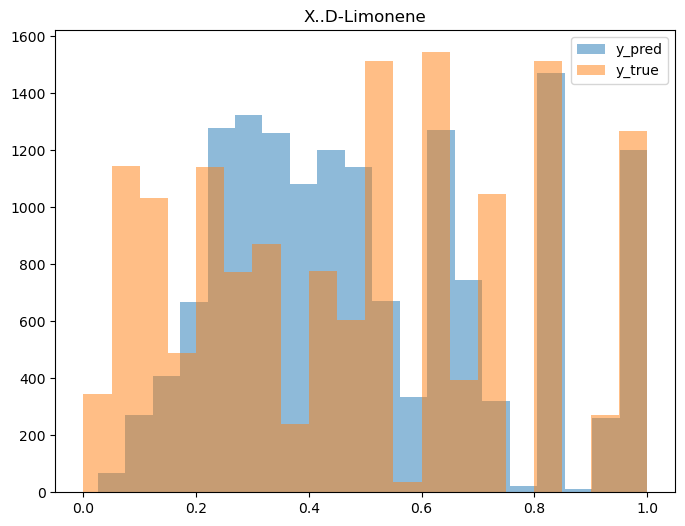

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..D-Limonene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_below_dlim.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.928
P-value: 0.000


<Axes: >

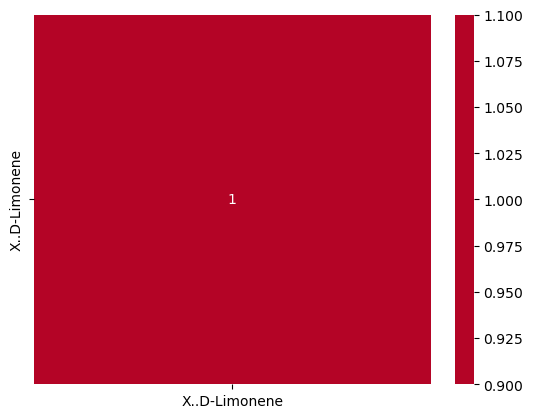

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)